<a href="https://colab.research.google.com/github/OWEN-JUN/keras_/blob/master/day0730_colab_keras26_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
from keras.callbacks import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import keras


170500096/170498071 [==============================] - 13s 0us/step
x_train shape: (50000, 32, 32, 3)
50000  train samples
32  test samples
(50000, 32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


NameError: ignored

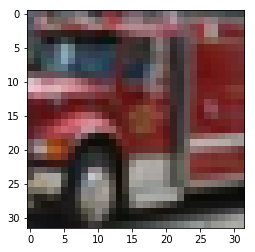

In [3]:
IMG_CHANNERLS = 3
IMG_ROWS = 32
IMG_COLS = 32

NB_EPOCH = 80
BATCH_SIZE = 500

NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# OPTIM = Adadelta
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
print("x_train shape:", x_train.shape)
print(x_train.shape[0], " train samples")
print(x_test.shape[1], " test samples")

digit = x_train[88]
plt.imshow(digit, cmap=plt.cm.binary)

# dim0 = x.shape[0]
# dim1 = x.shape[1]
# dim2 = x.shape[2]
# dim3 = x.shape[3]
# x_train = x_train.reshape(dim0, dim1 * dim2 * dim3)
# x_train = x_train.reshape(dim0, dim1 , dim2 , dim3)

def make_dim(x):
  x = x.flatten()
  x = x.reshape(x.shape[0],1)
  return x
def de_dim(x):
  x = x.flatten()
  x = x.reshape((-1,3))
  x = x.reshape((-1,32,3))
  x = x.reshape((-1,32,32,3))
  return x

y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)
print(x_train.shape)
print(x_train[0])

x_train = make_dim(x_train)
# x_train = x_train.astype("float32")
# x_test = x_test.astype("float32")
mima = MinMaxScaler()
scaler = StandardScaler()

mima.fit(x_train)
scaler.fit(x_train)
x1 = mima.transform(x_train)
x2 = scaler.transform(x_train)
x1 = de_dim(x1)
x2 = de_dim(x2)
x_test = make_dim(x_test)
x_test1 = mima.transform(x_test)
x_test2 = scaler.transform(x_test)
x_test1 = de_dim(x_test1)

x_test2 = de_dim(x_test2)





# print(x[0])
# print(x2[0])
# x_train/= 255
# x_test/= 255

In [7]:

model = Sequential()
model.add(Conv2D(32,(3,3),padding="same", input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNERLS)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(68,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(68,(3,3),))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=4))
model.add(Dropout(0.4))


model.add(Flatten())

model.add(Dense(NB_CLASSES))
model.add(Activation("softmax"))

model.summary()
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)

model.compile(loss="categorical_crossentropy", optimizer=OPTIM, metrics=["accuracy"])
early_stoping_callback = EarlyStopping(monitor="val_loss",patience=20)
history = model.fit(x1, y_train, batch_size=BATCH_SIZE, epochs=1, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[early_stoping_callback, tb_hist])

print("Testing-----")
score = model.evaluate(x_test1, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)

print("\nTest score:", score[0])
print("\nTest acc:", score[1])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
__________

In [1]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])

plt.title("model accuracy")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(["train","test"], loc="upper left")
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["loss","val_loss"], loc="upper left")
plt.show()

NameError: ignored